In [123]:
import math
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [124]:
b = 1
c = 5
system = signal.lti([b, 1], [1, c, b, b*c]) # (1+bp)x = (1+bp^2)(1+cp)y

$(1 + bp)x = (1 + bp^2)(1 + cp)y$

/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


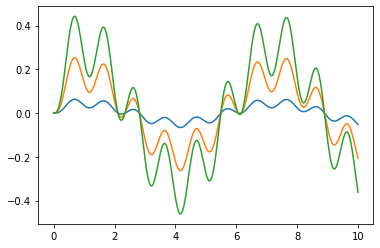

In [125]:
# constant frequency
freq = 1
T= np.linspace(0,10,1e4 + 1)

plt.figure()

for mag in range(1,10,3):
    S = [ mag*math.sin( t*2*math.pi*freq ) for t in T ]
    Tout, yout, xout = signal.lsim(system, S, T)
    plt.plot(Tout, yout)
    
plt.show()        
# судя по графикам амплитуда выходного сигнала увеличивается при увеличении исходной,
# а фаза остаётся неизменной

/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


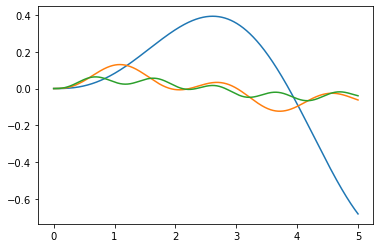

In [126]:
# constant magnitude
mag = 1
T= np.linspace(0,5,1e4 + 1)

plt.figure()

for freq in np.linspace(0.17, 1, 3): # phase = [ 1/3*pi, 7/6*pi, 2*pi ]
    S = [ mag*math.sin( t*2*math.pi*freq ) for t in T ]
    Tout, yout, xout = signal.lsim(system, S, T)
    plt.plot(Tout, yout)
    
plt.show()        
# амплитуда уменьшается
# фаза увеличивается

$A(\omega) = {\sqrt{1 + (b\omega)^2}\over|1 - b\omega^2|\sqrt{1 + (c\omega)^2}}$; 
$\phi(\omega) = arctg({(b-c)\omega\over1 + bc\omega^2})$

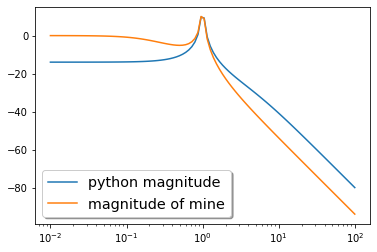

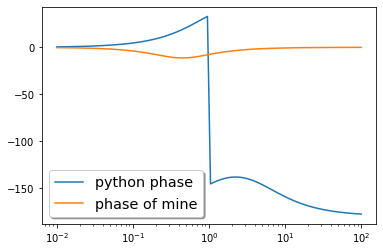

In [129]:
# АЧХ и ФЧХ
w, mag, phase = signal.bode(system)
A = [20*math.log10(math.sqrt(1+(b*t)**2)/( abs(1-b*t**2)*math.sqrt(1+(c*t)**2) ) )  for t in w]
phi = [20*np.log10(1 + math.atan( (b - c)*t/(1 + b*c*t**2) )) for t in w]

fig, ax = plt.subplots()
plt.semilogx(w, mag, label='python magnitude')
plt.semilogx(w, A, label='magnitude of mine')
ax.legend(loc='lower left', shadow=True, fontsize='x-large')

fig, ax = plt.subplots()
plt.semilogx(w, phase, label='python phase')
plt.semilogx(w, phi, label='phase of mine')
ax.legend(loc='lower left', shadow=True, fontsize='x-large')

plt.show()

$h(t) = 1 + {(bc - c^2)\over b + c^2 }e^{-t/c} + {b^{3/2}\over b + c^2}\sqrt{(1 - c)^2 + {(c + b)^2\over b} } \times sin({t\over \sqrt{b}} - arctg({1 - c\over c + b} \sqrt{b}))$

/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


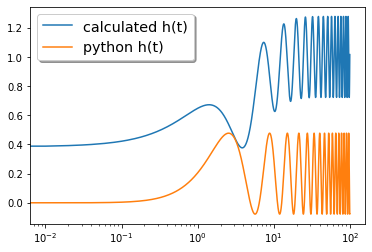

In [130]:
# график функции h(t)
T= np.linspace(0,1e2,1e4 + 1)

coef1 = (b*c - c**2)/(b + c**2)
coef2 = b**(3/2)/(b + c**2)*math.sqrt( (1 - c)**2 + (c + b)**2/b )
shift = math.atan( (1 - c)/(c + b)*b**0.5 )

h = [1 + coef1*math.exp(-t/c) + coef2*math.sin(t/b**0.5 - shift) for t in T ]
# реакция на ступеньку
S = np.ones_like(T)
Tout, yout, xout = signal.lsim(system, S, T)

fig, ax = plt.subplots()
plt.semilogx(T, h, label='calculated h(t)')
plt.semilogx(T, yout, label='python h(t)')
ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()